## <center>CITS5508 Lab sheet 2</center>

**Name: Zhanhong He** (or Zhanh He)<br>
**Student number: 22597343**<br>
**Date created:** 11 March 2021<br>
**Last modified:** 13 March 2021<br>

The Lab is using the **Dry Bean dataset** [1] supplied on the [UCI Machine Learning webpage].(http://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset)
> **Abstract:** Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.
>
> [1]: M. Koklu and I. A. Ozkan, "Multiclass classification of dry beans using computer vision and machine learning techniques," *Computers and Electronics in Agriculture*, vol. 174, p. 105507, 2020, doi: https://doi.org/10.1016/j.compag.2020.105507.
### Table of Content
Task 1. Load the data & Analysis<br>
Task 2. Check the instances<br>
Task 3. Split the dataset
<br>
Task 4. Perform features scaling<br>
Task 5. Support Vector Classifier<br>
Task 6. Stochastic Gradient Descent Classifier<br>
Task 7. Results Discussion<br>


In [1]:
import openpyxl
import os # Make sure dataset and notebook in the same folder
print('Notebook working directory : ',os.getcwd())     # Task 1

import pandas as pd
from pandas.plotting import scatter_matrix            # Task 1

import sklearn
from sklearn.model_selection import train_test_split  # Task 4
from sklearn.preprocessing import StandardScaler      # Task 4
from sklearn.preprocessing import MinMaxScaler        # Task 4

from sklearn.svm import SVC                           # Task 5
from sklearn.metrics import plot_confusion_matrix     # Task 5
from sklearn.linear_model import SGDClassifier        # Task 6

import numpy as np
import matplotlib.pyplot as plt

Notebook working directory :  C:\Users\zhanh\Desktop\CITS5508


## Task 1. Load the data & Analysis

Task 1 is composed of:<br>
+ 1.1 Use appropriate function to read `xlsx`<br>
+ 1.2 Display **first few lines** when inspecting columns<br>
+ 1.3 Use appropriate function to **visualise features**<br>
+ 1.4 Select 6 features to illustrate their `scatter_matrix`<br>
+ 1.5 Describe features and their relationship


In [2]:
# 1.1 - Use Openpyxl to read xlsx files

# Use `join` to avoid path error of different OS system
path = os.path.join('DryBeanDataset', 'Dry_Bean_Dataset.xlsx')
wb = openpyxl.load_workbook(path)
ws = wb['Dry_Beans_Dataset'] # Access accurate worksheet

# Convert to Pandas Dataframe, with features name as header
data = ws.values
columns = next(data)[0:]
dataset = pd.DataFrame(data, columns = columns)

In [3]:
# 1.2 - Display the first few lines when inspecting columns

num_lines = 5  # Limit 5 lines per columns
dataset.head(num_lines)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
# 1.3 - Visualise the different features

# Select 6 features for analysis, excluding string feature "Class"
select_features =  ['Area','Perimeter','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']

# Visualise statistic values
dataset[select_features].describe()

,Area,Perimeter,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,0.010451,0.003665,0.974767,0.999733


### 1.4 - illustrate the scatter matrix of 6 features
If directly using `pandas.plotting.scatter_matrix`, our select features should excluding the `Class` since the **string** are unable to be displayed. Since the "Class" is a crucial feature for analysing Beans charateristics, labeling each class of beans with different colors will be an great enhance. By citing the [source code](https://stackoverflow.com/questions/22943894/class-labels-in-pandas-scattermatrix) of `Seaborn`, this advance `factor_scatter_matrix` [2] can be realized without extra packages. Some adjustment is applied since the original code is for `Python 2`.

>
> [2]	bgschiller. "Class labels in Pandas scattermatrix.", *Stackoverflow*, 2014, [Online], https://stackoverflow.com/questions/22943894/class-labels-in-pandas-scattermatrix (Accessed March 19, 2021).


In [5]:
def factor_scatter_matrix(df, factor, palette=None):
    
    import matplotlib.colors
    from scipy.stats import gaussian_kde

    if isinstance(factor, str):
        factor_name = factor # save off the name
        factor = df[factor] # extract column
        df = df.drop(factor_name,axis=1) # remove from df, so it 
        # doesn't get a row and col in the plot.
    classes = list(set(factor))

    if palette is None:
        palette = ['#e41a1c' , '#377eb8', '#4eae4b',  # \ Red   \ Blue  \ Green \
                   '#994fa1' , '#ff8101', '#fdfc33',  # \ Purple\ Orange\ Yellow\
                   '#a8572c' , '#f482be', '#999999']  # \ Brown \ Pink  \ Gray  \
    color_map = dict(zip(classes,palette))

    if len(classes) > len(palette):
        raise ValueError(format(len(palette), len(classes)))

    colors = factor.apply(lambda group: color_map[group])
    axarr = scatter_matrix(df,figsize=(20,15), alpha=0.2,marker='x',c=colors,diagonal='kde')

    for rc in range(len(df.columns)):
        for group in classes:
            y = df[factor == group].iloc[:,rc].values
            gkde = gaussian_kde(y)
            ind = np.linspace(y.min(), y.max(), 1000)
            axarr[rc][rc].plot(ind, gkde.evaluate(ind),c=color_map[group])
            
    return axarr, color_map

{'BOMBAY': 'Red', 'SIRA': 'Blue', 'BARBUNYA': 'Green', 'DERMASON': 'Purple', 'SEKER': 'Orange', 'HOROZ': 'Yellow', 'CALI': 'Brown'}


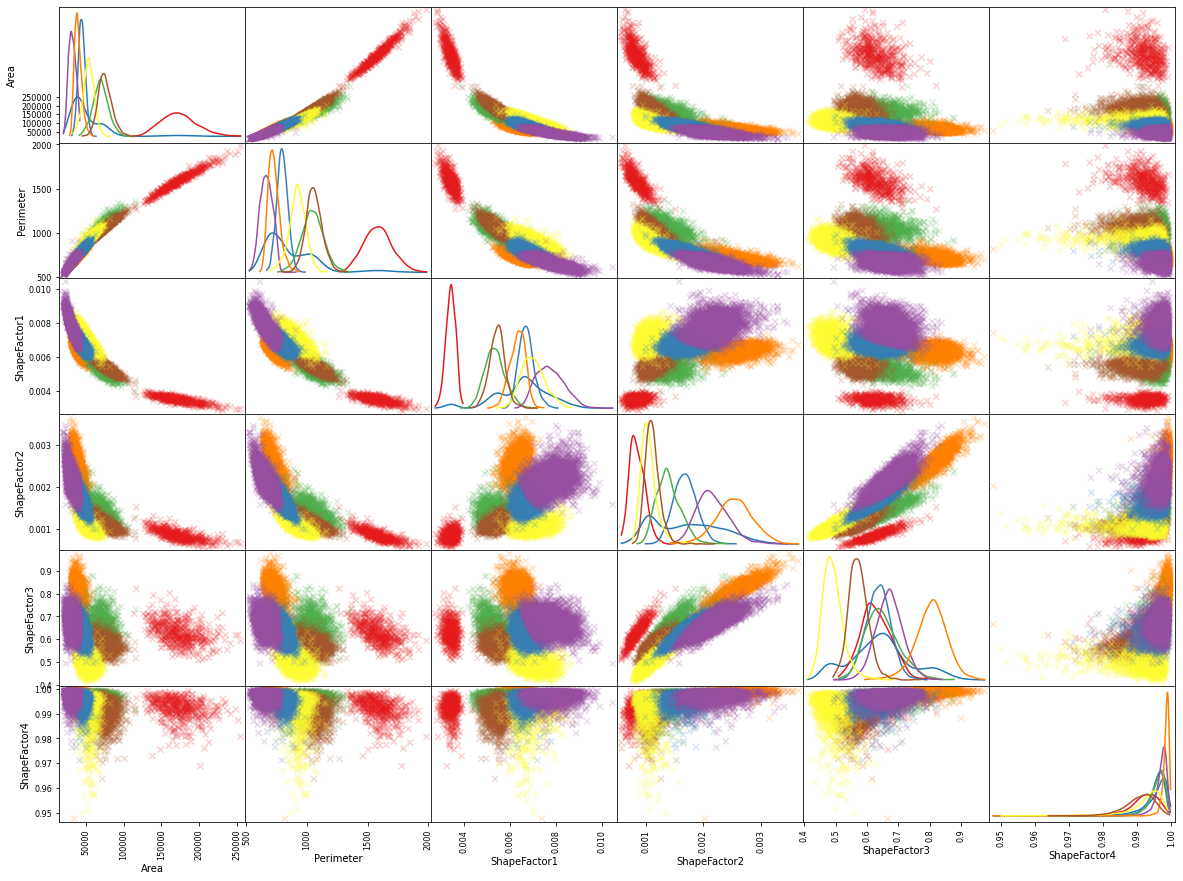

In [6]:
# Add advance features 'Class' for labeling colors
advance_features = select_features + ['Class']

# Utilise the cited function
fig,color = factor_scatter_matrix(dataset[advance_features], 'Class', palette = None)

colorname = ['Red'   , 'Blue'   , 'Green'  , # Refer to color palette
             'Purple', 'Orange' , 'Yellow' ,
             'Brown' , 'Pink'   , 'Gray'   ]
print(dict(zip(color,colorname)))            # Shows 'Class' corresponding colors
plt.show()

### 1.5 - Describe the scatter matrix
According to the observation, we have:
+ No matter which Class of beans, the planting `Area` of Bean is positively correlating to its `Perimeter`.This makes sense, because the larger the bean's leaf implying the more area it probably covers.
+ `ShapeFactor1` and `ShapeFactor2` are negatively correlating to the `Area` or `Perimeter`, these shape features maybe highly related to bean size
+ `ShapeFactor2` and `ShapeFactor3` are positively correlated, although `ShapeFactor3` are less affective by size factors such as `Area`

<br>Additionally with `Class` information, we have:
+ Bombay is significantly different from the other beans in size, such as `Area`, `Perimeter`,and even `ShapeFactor1` (refer to diagional *kde* figure)
+ The `ShapeFactor4` of all types of beans are relatively similar

## Task 2. Check the instances

Task 2 is composed of:<br>
+ 2.1 Use an appropriate function to display the number of instances of each Class<br>
+ 2.2 Which class has the fewest instances?

In [7]:
# 2.1 - Count instances each Class

# Select certain column then count
each_class = dataset["Class"].value_counts(ascending=True)
print('Each class have instances:\n',each_class)

# 2.2 - The fewest instances Class

# Find minimum instances, then show its index (Class)
min_class = each_class[each_class == each_class.min()].index
print('\nFewest instances class is:',min_class)

Each class have instances:
 BOMBAY       522
BARBUNYA    1322
CALI        1630
HOROZ       1928
SEKER       2027
SIRA        2636
DERMASON    3546
Name: Class, dtype: int64

Fewest instances class is: Index(['BOMBAY'], dtype='object')


## Task 3. Split the dataset

The subsequent training process should involve only the training set. <br> Task 3 is composed of:<br>
+ 3.1 Use `train_test_split` to split a testing set: **80/20 split**<br>
+ 3.2 Count the instances in training set and testing sets

In [8]:
# 3.1 - Split the select_features set

# So far 6 features are selected, split ratio 80/20 with "Class"
X_train, X_test, y_train, y_test = train_test_split(dataset[select_features],dataset["Class"],
                                                    test_size=0.20,train_size=0.80,random_state=42)

# 3.2 - Count the instances of training/testing set
'''
In training set each instance occupy one index. Apply .index to indicate the "Instances", 
with .size to realize the "Count" function
'''
print('Instances in X or y training set:', X_train.index.size)
print('Instances in X or y testing  set:', X_test.index.size)

Instances in X or y training set: 10888
Instances in X or y testing  set: 2723


## Task 4. Perform features scaling

Use either `StandardScaler` or `MinMaxScaler` class on this step. Correctly apply `fit`, `transform` and `fit_transform` function. Remember to apply the same transformation on the test step (i.e. on the testing set).<br>

### 4.1 [StandardScaler](https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler) 
Standard Scaler will standardize features by removing the mean and scaling to unit variance, where `x` is a sample, `u` is the mean of training samples (or zero), and `s` is the standard deviation of training samples.
<center>$\text{Standardization: }z = (x - \mu) / \sigma \tag{1}$</center><br>
<center>$\text{Mean: } \mu = \frac{1}{N}\sum_{i=1}^N (x_i)$ </center><br>
<center>$\text{Standard deviation: }\sigma =\sqrt{\frac{1}{N}\sum_{i=1}^N
                        (x_i - \mu)^2}$</center><br>

For perform features scaling, I prefer the **Standard Scaler** because the less susceptible of outliers. The Machine learning estimators might behave badly if individual features do not more or less look like normlally distributed data.<br><br>
**Skip the features scaling for y_test:** To calculate the accuracy score, the `score()` on Task5 requires original y_test for the prediction (y_pred).Thus y_train and y_test have been kept for vertification.

In [9]:
# 4.1 - Perform features scaling: Standard Scaler

# Normalise the X_train/test; Keep the y_train/test
std_scale = StandardScaler().fit(X_train) # fit to training set
X_train_std= std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

### 4.2 [MinMaxScaler](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#standardization-and-min-max-scaling)
The equation of Min-Max Scaler is:
 <center>$X_{norm}=\frac{X-X_min}{X_max - X_min}\tag{2}$</center><br>
We can also perform **Min-Max Scaler** for comparison. By changing `std_scale` with following `mmx_scale`, then import to *Task5 & Task6*, both applying `classifier.score` function to compare their accuracy. This processing will shows **Min-Max Scaler** getting the worse result than **Standard Scale**.

In [10]:
# 4.2 - Perform features scaling: Min-Max Scaler

mmx_scale = MinMaxScaler().fit(X_train)
X_train_mmx= mmx_scale.transform(X_train)
X_test_mmx = mmx_scale.transform(X_test)

# Task5 - SVC with mmx_scaler
svm_clf_mmx = SVC(kernel='rbf',gamma=0.5,C=30).fit(X_train_mmx, y_train)
print('MMScaler SVC Accuracy:',svm_clf_mmx.score(X_test_mmx, y_test))

# Task6 - SGDC based on section 4.2: MinMaxScaler
sgd_clf_mmx = SGDClassifier().fit(X_train_mmx, y_train)
print('MMScaler SGDC Accuracy:',sgd_clf_mmx.score(X_test_mmx, y_test))

MMScaler SVC Accuracy: 0.9258171134777818
MMScaler SGDC Accuracy: 0.8968049944913699


## Task 5. Support Vector Classifier
Use the *Support Vector Classifier* implemented in the `sklearn.svm.SVC` class to perform one-versus-one binary classification on the training set.<br>(Tips: You should be able to get reasonably good results if you use the *Radial Basis Function* kernel.)
+ 5.1 Choose **appropriate hyperparameter** values for your Support Vector Classifier and **describe** them
+ 5.2 Show the **confusion matrix** on the testing set

### 5.1 - SVClassifier & hyperparameter
For the Support Vector Classifier, primately we can use 3 different kernel: `linear` for the liner hyperplane, and `rbf` & `poly` for non-linear hyperplane ![avatar](https://miro.medium.com/max/875/1*zqEbdsAbN4QqDdJ6L5pjnw.png)<br>
Since we have mentioned to use `rbf` kernel for better results, the others hyperparameter will be:

1. `gamma`: the higher `gamma` value tries to exactly fit the training dataset<br>\+ Increasing gamma might leads to overfitting<br>\- A small gamma such as `gamma=0.1` (i.e. approximate to linear hyperplane) also implying an poor fitting result<br>
<br>
2. `C`: the penalty parameter of the error term; or, trade off classification accuray and decision margin maximization<br>\+ Larger C,the optimization will choose smaller-margin hyperplane when classify correctly<br>\- Smaller C, optimization try to keep a large-margin hyperplane even they have some wrong classification

After several attempts at `gamma` and `C`, comparing the accuracy with `score()`, I found two good results when `gamma=0.5, C=30` or `gamma=1, C=3`.This indicates the effects of `gamma` and `C` on accuracy are not independent of each other (they have an joint effect on *SVClassifier*).


In [11]:
# 5.1 - SVC based on different hyperparameters

svm_clf1 = SVC(kernel='rbf',gamma=0.5,C=30).fit(X_train_std,y_train)
svm_clf2 = SVC(kernel='rbf',gamma=1,C=3).fit(X_train_std,y_train)

# Explore best hyperparameter values
print('SVC Accuracy based on 1st hyperparameters:',svm_clf1.score(X_test_std, y_test))
print('SVC Accuracy based on 2nd hyperparameters:',svm_clf2.score(X_test_std, y_test))

SVC Accuracy based on 1st hyperparameters: 0.9280205655526992
SVC Accuracy based on 2nd hyperparameters: 0.9272860815277267


### 5.2 - Show the Confusion Matrix
Plot the confusion matrix with function `plot_confusion_matrix` from `Pandas.metrics`. In this step I used the **first group hyperparamters**, i.e., the group with better accuracy.

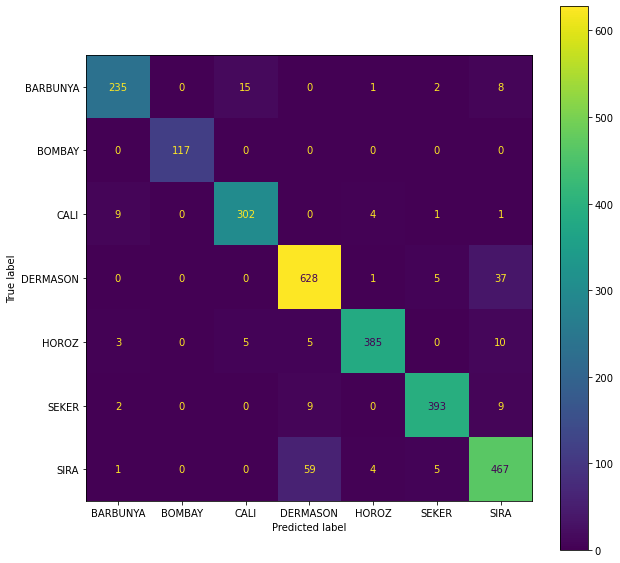

In [12]:
# 5.2 - Show the Confusion Matrix

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(svm_clf1, X_test_std, y_test, ax=ax) # First group hyperparameters
plt.show()

## Task 6. Stochastic Gradient Descent Classifier
Repeat the **Task5** with *Stochastic Gradient Descent Classifier* with `SDGClassifier()`. Hence, this task is composed of:
+ 5.1 Choose **appropriate hyperparameter** values for SGDClassifier and **describe**
+ 5.2 Show the **confusion matrix** on the testing set<br>

The advantages of SGDClassifier are:
+ Efficiently handling very large datasets
+ Ease of implementation, tunning lots of parameters are possible<br>

The disadvantages are:
+ Needs priorly detemind the regularization and iterations
+ Sensitive to feature scaling<br>

### 6.1 - SGDClassifier & hyperparameter
For the hyperparameter, SGDClassifier have:
1. **loss**: `loss="hinge"` is the (soft-margin) linear Support Vector Machine; `loss="modified_huber"` is the smoothed hinge loss; `loss="log"` is the logistic regression; and etc ![avatar](https://scikit-learn.org/stable/_images/sphx_glr_plot_sgd_loss_functions_001.png)<br>

During my test, `loss="hinge"` has shown the best result; while `penalty=l1, max_iter=50` getting an better results than `penalty=l2, max_iter-25`<br>

2. **penalty**: `penalty="l2"` is the L2 norm penalty on coef_; while `penalty="l1"` is L1 norm penalty on coef_; or `penalty="None"`no regularization<br>
<br>
3. **max_iter**: maximum iterations<br>

When `penalty=l1 ` and `max_iter` reaches `50`, increasing the `max_iter` does not make any more changes. Notably, when `penalty=l1, max_iter<50`, the result will come with a **warming "Consider increasing max_iter to improve the fit"**. Although lowering `max_iter` may improve the accuracy obtained by `score()`, resulting accuracy is high likely an fraud caused by insufficient fitting degree. Similarly, `max_iter=25` are the limit values of `penalty=l2`.<br>

4. **learning_rate and eta0**: can select `optimal`, `invscaling` or many others for `learning_rate`; and exactly floats for `eta0`<br>
<br>
5. **random_state** and many ELSE hyperparameters are affective <br>

SGDClassifier relies on randomness during training, every rerun will yield different results despite same parameters are used. For comparing the changes caused by varying parameters, we must limit the random case of SGDClassifier, i.e., setting `random_state=10` as example.

Although the **SGDClassifier results are stochastic**, in my attempts, the accuracy scores of SGDClassifier were **never better** than SVClassifier results.

In [13]:
# 6.1 - SGDC based on different hyperparameters

sgd_clf1 = SGDClassifier(loss="hinge",penalty="l1",max_iter=50, random_state=10).fit(X_train_std,y_train)
sgd_clf2 = SGDClassifier(loss="hinge",penalty="l2",max_iter=25, random_state=10).fit(X_train_std,y_train)

# Explore best hyperparameter values
print('SGDC Accuracy based on 1st hyperparameters:',sgd_clf1.score(X_test_std, y_test))
print('SGDC Accuracy based on 2nd hyperparameters:',sgd_clf2.score(X_test_std, y_test))

SGDC Accuracy based on 1st hyperparameters: 0.9181050312155711
SGDC Accuracy based on 2nd hyperparameters: 0.9170033051781123


### 6.2 - Show the Confusion Matrix
Plot the confusion matrix with `Pandas.metrics`. Since both groups hyperparameters always generates the fluctuant/stochastic results (if `random_state` is undefined), simply choose the **first group hyperparameters** for `plot_confusion_matrix`.

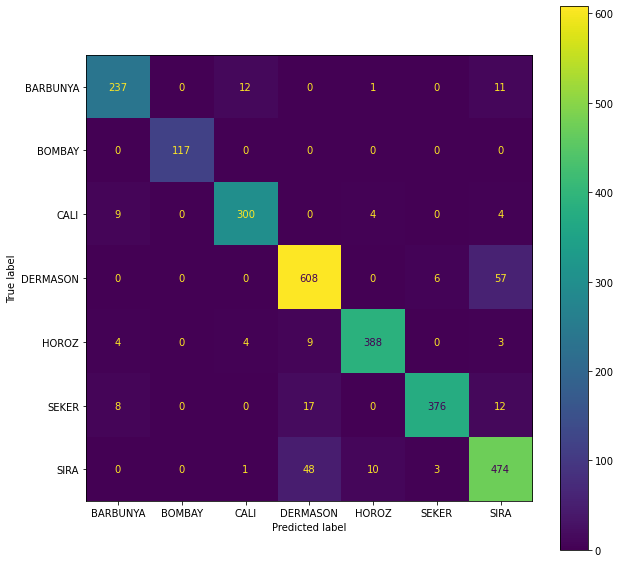

In [14]:
# 6.2 - Show the Confusion Matrix

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(sgd_clf1, X_test_std, y_test, ax=ax) # First group hyperparameters
plt.show()

## 7. Results Discussion
Based on the comparison of confusion matrices and `score()` results of two classifiers, we can know that:

Comparing `score()` results,
+ For SVClassifier, the effect of `gamma` and `C` are not independent
+ SDGClassifier has too many parameters to define (time costly), and its results are fluctuant/stochastic
+ SVClassifier are generally more accurate than SDGClassifier on this experiment<br>

Comparing `confusion_matrix`,
+ According to confusion matrix, SVClassifier has less error when classifying all "Class" of beans
+ Both Classifiers performance poorly on distinguish `Class="SIRA"` and `Class="DERMASON"`